# Actividad
Redes neuronales completamente conectadas
aplicadas en MNIST reconocimiento de dígitos
manuscritos.



---
Por: Ángela Daniela Córdoba Álvarez


---




En este caso se trata el conjunto de datos MNIST (Modified National Institute of Standards and Technology) sobre imágenes que contiene dígitos escritos a manos. El conjunto de datos MNIST consiste en un total de 70,000 imágenes en escala de grises de
28x28 píxeles. Estas imágenes están divididas en dos conjuntos: uno de entrenamiento, que
contiene 60,000 imágenes, y otro de prueba, que contiene 10,000 imágenes. Cada imagen
representa un único dígito del 0 al 9.

In [1]:
import keras
# Cargar el conjunto de datos MNIST
mnist = keras.datasets.mnist
# Cargar la división de entrenamiento y prueba del conjunto de datos MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Label: 5
Image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 1

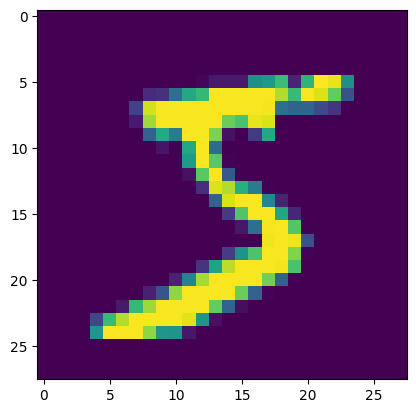

In [2]:
# Visualización de una muestra, seleccionando un índice del conjunto
import numpy as np
import matplotlib.pyplot as plt
index = 0
np.set_printoptions(linewidth=320) # Imprimir la etiqueta e imagen
print(f'Label: {training_labels[index]}')
print(f'Image:\n {training_images[index]}')
# Visualizar la imagen
plt.imshow(training_images[index])


In [3]:
# Normalizar los valores de los datos de píxeles de las imágenes dividiendo por 255.0
# Así los valores estarán dentro del rango [0,1]
training_images = training_images / 255.0
test_images = test_images / 255.0

In [4]:
# Construir un modelo secuencial
'''
Consta de una capa de aplanamiento para convertir una imagen 2D en un vector 1D,
junto con 2 capas completamente conectadas con una función de activación ReLU y
una capa de salida softmax
'''
# Modelo de clasificación
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')])

In [5]:
# Compilar el modelo, especificando optimizador, función de pérdida y métricas
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Entrenar el modelo con los datos de entrenamiento especificando número de épocas
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 11ms/step - loss: 0.2666 - accuracy: 0.9242
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1175 - accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0803 - accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0595 - accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0455 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0359 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0292 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0224 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0197 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0

<Axes: >

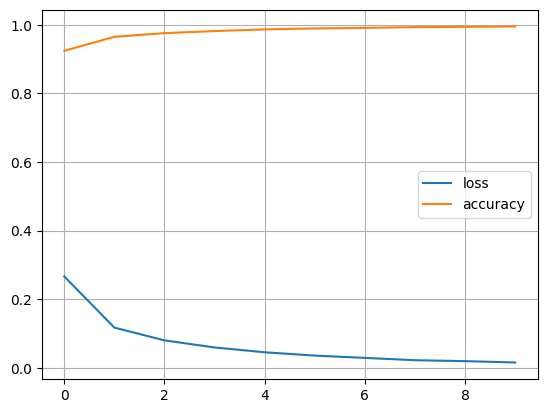

In [7]:
# Importar la biblioteca pandas
import pandas as pd

# Graficar historial de entrenamiento usando pandas para convertirlo a DataFrame
# Trazar curvas de pérdida y métricas durante entrenamiento y validación
pd.DataFrame(history.history).plot(grid=True)

In [8]:
# Evaluar el modelo en entrenamiento y prueba
# Esto proporciona la pérdida y la precisión del modelo

# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0147 - accuracy: 0.9959
Pérdida en el conjunto de entrenamiento: 0.014749600552022457
Precisión en el conjunto de entrenamiento: 0.9959166646003723
313/313 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9774
Pérdida en el conjunto de prueba: 0.08511519432067871
Precisión en el conjunto de prueba: 0.977400004863739


In [9]:
# Predicción de una muestra, evaluando el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9774
Pérdida en el conjunto de prueba: 0.08511519432067871
Precisión en el conjunto de prueba: 0.977400004863739


1/1 [==============================] - 0s 85ms/step
Etiqueta real: 7
Predicción del modelo: 7


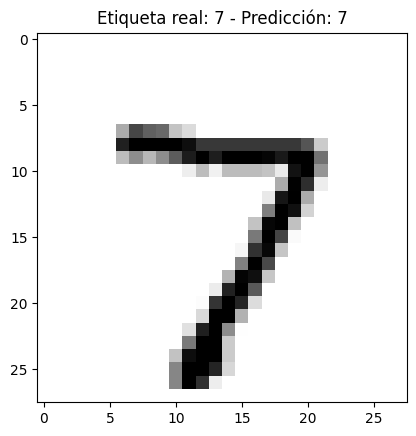

In [10]:
# Seleccionar una muestra del conjunto de prueba
sample_index = 0  # Puedes cambiar este índice para probar diferentes muestras
sample_image = test_images[sample_index]
sample_label = test_labels[sample_index]

# Realizar la predicción utilizando el modelo entrenado
predictions = model.predict(np.array([sample_image]))
predicted_label = np.argmax(predictions[0])

# Imprimir la etiqueta real y la predicción
print(f'Etiqueta real: {sample_label}')
print(f'Predicción del modelo: {predicted_label}')

# Visualizar la muestra
plt.imshow(sample_image, cmap=plt.cm.binary)
plt.title(f'Etiqueta real: {sample_label} - Predicción: {predicted_label}')
plt.show()


1/1 [==============================] - 0s 23ms/step
Etiqueta real: 3
Predicción del modelo: 3


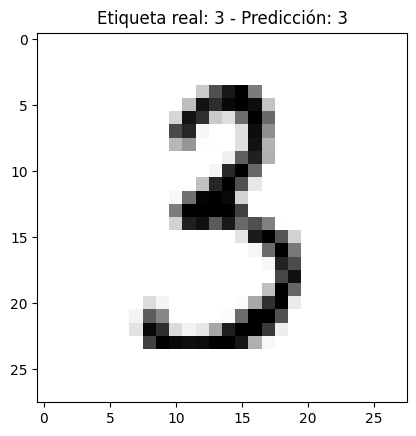

In [11]:
# Otro ejemplo con otra muestra
# Seleccionar una muestra aleatoria del conjunto de prueba
import random
random_index = random.randint(0, len(test_images) - 1)
sample_image = test_images[random_index]
sample_label = test_labels[random_index]

# Realizar la predicción utilizando el modelo entrenado
predictions = model.predict(np.array([sample_image]))
predicted_label = np.argmax(predictions[0])

# Imprimir la etiqueta real y la predicción
print(f'Etiqueta real: {sample_label}')
print(f'Predicción del modelo: {predicted_label}')

# Visualizar la muestra
plt.imshow(sample_image, cmap=plt.cm.binary)
plt.title(f'Etiqueta real: {sample_label} - Predicción: {predicted_label}')
plt.show()


## Preguntas para reflexionar:



1.   **¿Qué conjunto de datos se utiliza en este código y qué problema se pretende resolver?**

>> El conjunto de datos es el MNIST, que contiene imágenes de dígitos manuscritos del 0 al 9. A su vez, el problema que se pretende resolver es un problema de clasificación de imágenes, de modo que el modelo aprenda a identificar imágenes y clasificar correctamente los dígitos de dichas imágenes.

2.   **¿Por qué es importante normalizar los valores de los píxeles de las imágenes antes de entrenar el modelo?**

>> Es importante hacer normalización porque la red neuronal funciona mejor cuando los datos de entrada estáen un rango más pequeño. También mejora del rendimiento del algoritmo, ya que funciona mejor cuando las características de entrada están en un rango similar; además, la normalización puede ayudar a evitar que ciertas características dominen otras debido a su escala.

3. **¿Qué arquitectura de red neuronal se utiliza en este código y cuántas capas tiene?**

>> La arquitectura utilizada es una feedforward simple (o modelo secuencial) y tiene 3 capas: la de entrada (aplanamiento) que pasa la imagen 2D de 28x28 a un vector 1D de 784 elementos. La capa oculta tiene 128 neuronas y usa función de activación ReLU. La capa de salida densa tiene 10 neuronas y usa función de activación softmax.

4. **¿Cuál es la función de activación utilizada en la capa oculta y en la capa de salida del modelo, y por qué se eligen esas funciones?**

>> En la capa oulta se usa ReLU porque ayuda a que el modelo aprenda patrones complejos. En la capa de salida se usa 'softmax' porque convierte los valores de salida en probabilidades que suman 1, facilitando la interpretación de las predicciones.

5. **¿Qué función de pérdida y qué métricas se utilizan para evaluar el rendimiento del modelo?**

>> La función de pérdida usada es *'sparse_categorical_crossentropy'* donde las etiquetas son enteros en lugar de vectores one-hot. Y la métrica usada es 'accuracy' o precisión, que ayuda a medir el porcentaje de predicciones.

6. **¿Cuántos epochs se utilizan para entrenar el modelo y por qué ese número?**

>> Se usan 10 epochs. Es escogido dicho número para proporcionarle suficiente tiempo al modelo para aprenderse los patrones en los datos.

7. **¿Qué significa la función model.summary() y qué información proporciona?**

>> Esta función proporciona un resumen de la arquitectura del modelo. La función proporciona información sobre las capas, los tipos de capa, la forma de salida de cada capa, el número de parámetros, el total de parámetros, etc. Lo cual ayuda a entender la estructura del modelo y el tamaño de los datos que pasan por cada capa.

8. **¿Qué técnicas específicas se emplean para evitar el sobreajuste del modelo?**

>> Normalización de los valores de los píxeles, lo cual ayuda a que el modelo aprenda de forma eficiente mientras reduce la varianza. Ayuda a que los algoritmos de aprendizaje automático funcionen mejor, ya que los valores de entrada estarán en un rango similar.

>> Y el uso de conjunto de datos grande como el MNIST, proporciona representación de los dígitos manuscritos para que el modelo generalice mejor la información.




## Ejercicios de exploración

#### Predicción de una muestra:

In [12]:
sample_index = 0
sample_image = test_images[sample_index]
predictions = model.predict(np.array([sample_image]))
predicted_label = np.argmax(predictions[0])
print(f'Etiqueta real: {test_labels[sample_index]}')
print(f'Predicción del modelo: {predicted_label}')

1/1 [==============================] - 0s 20ms/step
Etiqueta real: 7
Predicción del modelo: 7


#### Interpretación de la lista de números:


Los números representan las probabilidades de cada una de las 10 clases (dígitos 0-9).



#### Experimentar con el número de neuronas en la capa oculta:

In [13]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(30, activation='relu'),  # Cambiar el número de neuronas
  keras.layers.Dense(10, activation='softmax')
])

#### Cambiar la función de activación:

In [14]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='tanh'),  # Cambiar la función de activación
  keras.layers.Dense(10, activation='softmax')
])
# Imprimir
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Eliminar la capa Flatten:

Eliminar la capa Flatten causará un error porque el modelo necesita convertir la imagen 2D a un vector 1D para procesarla en las capas densas.

#### Probar diferentes optimizadores:

In [15]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Aumentar el número de épocas:

In [16]:
history = model.fit(training_images, training_labels, epochs=20)  # Aumentar a 20 épocas

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6233 - accuracy: 0.8405
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3581 - accuracy: 0.9006
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3153 - accuracy: 0.9102
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2904 - accuracy: 0.9177
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2714 - accuracy: 0.9228
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2554 - accuracy: 0.9275
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2412 - accuracy: 0.9319
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2283 - accuracy: 0.9352
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2166 - accuracy: 0.9389
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.205

#### Modificar la arquitectura de la red:

In [17]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),  # Agregar una capa adicional
  keras.layers.Dense(10, activation='softmax')
])

#### Eliminar la normalización de los valores de píxeles:

In [18]:
'''
No normalizar los valores de los píxeles de las imágenes antes de entrenar el
modelo puede afectar el rendimiento del modelo.
'''
# No normalizarlo implica omitir lo siguiente:
# training_images = training_images / 255.0
# test_images = test_images / 255.0

'\nNo normalizar los valores de los píxeles de las imágenes antes de entrenar el \nmodelo puede afectar el rendimiento del modelo.\n'

#### Considerar las capas finales:

La capa final tiene 10 neuronas porque hay 10 clases (dígitos 0-9). Cambiar esto a un número diferente no tendría sentido para este problema específico.



#### Entrenar la red con un número diferente de capas finales y probar el modelo con imágenes de prueba:

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
187

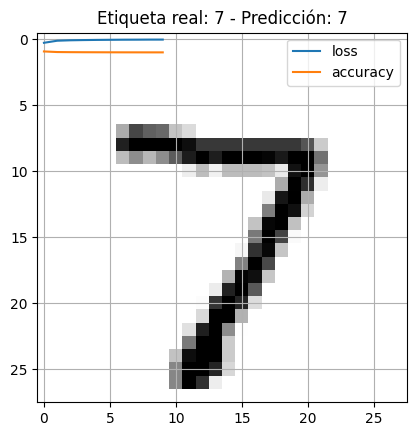

In [19]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el conjunto de datos MNIST
mnist = keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Normalizar los valores de los datos de píxeles de las imágenes dividiendo por 255.0
training_images = training_images / 255.0
test_images = test_images / 255.0

# Modificar el modelo para incluir más capas finales
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),  # Añadir una capa adicional
  keras.layers.Dense(32, activation='relu'),  # Añadir otra capa adicional
  keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo, especificando optimizador, función de pérdida y métricas
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Entrenar el modelo con los datos de entrenamiento especificando número de épocas
history = model.fit(training_images, training_labels, epochs=10)

# Graficar historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

# Seleccionar una muestra del conjunto de prueba
sample_index = 0
sample_image = test_images[sample_index]
predictions = model.predict(np.array([sample_image]))
predicted_label = np.argmax(predictions[0])
print(f'Etiqueta real: {test_labels[sample_index]}')
print(f'Predicción del modelo: {predicted_label}')

# Visualizar la muestra
plt.imshow(sample_image, cmap=plt.cm.binary)
plt.title(f'Etiqueta real: {test_labels[sample_index]} - Predicción: {predicted_label}')
plt.show()